# <span style="color:blue"> **Assignment 2: Multivariate Linear Regression**</span>

## <span style="color:blue"> **Modules & Packages**</span>

In [1]:
# Pandas: To manipulate DataFrames
import pandas as pd
# Seaborn & Matplotlib: Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
# Statsmodels: To estimate our regression model and perform heteroskedatsicity tests
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tools.tools as smt
import statsmodels.stats.diagnostic as smd
# Numpy: For mathematical computations
import numpy as np

## <span style="color:blue"> **The Dataset**</span>

In [116]:
# Creation of the DataFrame from multiple tables stored in an Excel file
sheet = ["Y variable", "x1-market", "x2-value", "x3-small"]
sets = []

data_dict = {}
for title in sheet:
    data_dict[title] = pd.DataFrame(pd.read_excel("TP2-Dataset.xlsx", skiprows = range(6), sheet_name=title)\
                .iloc[:][['Date', 'PX_LAST']])
    data_dict[title].set_index('Date', inplace=True)
    data_dict[title].sort_index(ascending = True, inplace=True)
    data_dict[title].index = pd.to_datetime(data_dict[title].index)
    data_dict[title][title] = np.log(data_dict[title]['PX_LAST']/data_dict[title]['PX_LAST'].shift(1))
    del data_dict[title]['PX_LAST']
    data_dict[title] = data_dict[title].dropna()
    sets += [data_dict[title]]

df = pd.concat(sets, axis = 1)

In [117]:
start = df.index[0]
end = df.index[-1]

In [118]:
import yfinance as yf

# Downloading the data from Yahoo Finance
oil = yf.download(tickers = "CL%3DF", start = start, end = end, interval = "1wk", ).iloc[:]['Close']

df['Oil'] = list(oil)
df.Oil = np.log(df.Oil/df.Oil.shift(1))

df = df.dropna()

[*********************100%***********************]  1 of 1 completed


<AxesSubplot: xlabel='Date'>

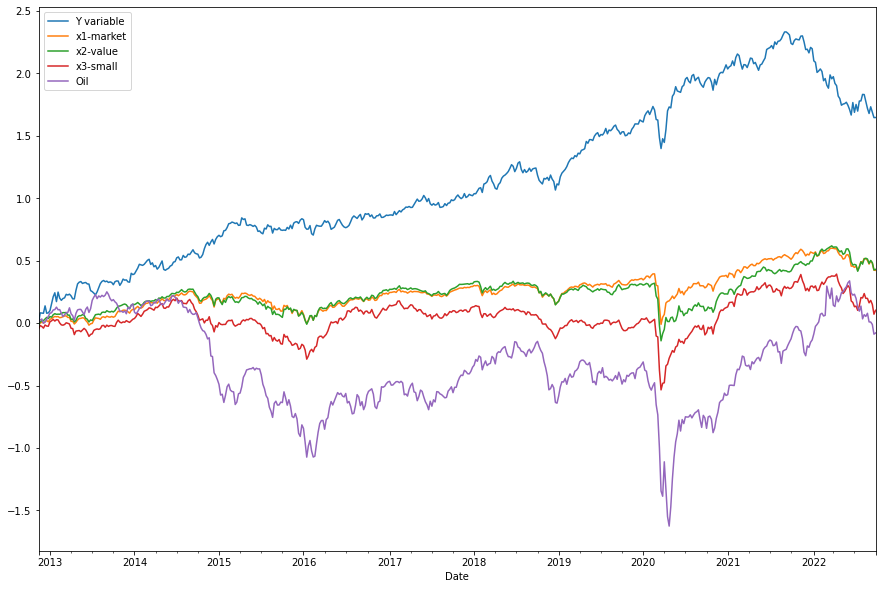

In [119]:
df.cumsum().plot(figsize=(15, 10))

In [120]:
df.corr()

,Y variable,x1-market,x2-value,x3-small,Oil
Y variable,1.000000,0.570429,0.394654,0.446162,0.078382
x1-market,0.570429,1.000000,0.938806,0.865467,0.457870
x2-value,0.394654,0.938806,1.000000,0.821633,0.488564
x3-small,0.446162,0.865467,0.821633,1.000000,0.493558
Oil,0.078382,0.457870,0.488564,0.493558,1.000000
